# Data Collection

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('CVDdataset/cardio_train.csv', sep=';')
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [3]:
df.shape

(70000, 13)

# Data Cleaning

In [4]:
# Checking for  null values

df.isnull().all()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [5]:
# Removing columns containing uniques values that offer no informaation

df.drop(columns=['id'], inplace=True)

In [6]:
duplicate_sum = df.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

Duplicates Rows in Dataset are : 24


In [7]:
# Identifying duplicates in the dataset

duplicated = df[df.duplicated(keep=False)]
df.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(df.shape[0], df.shape[1]))
duplicated.head()

Total 69976 datapoints remaining with 12 features


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1142,17493,2,169,74.0,120,80,1,1,0,0,1,1
1204,16793,1,165,68.0,120,80,1,1,0,0,1,0
1568,21945,1,165,60.0,120,80,1,1,0,0,1,0
1612,20293,1,162,70.0,110,70,1,1,0,0,1,0
2305,20495,1,165,70.0,120,80,1,1,0,0,1,0


In [8]:
# Renaming the attributes for better understanding and clarity
df.rename(columns={'ap_hi': 'systolic', 'ap_lo': 'diastolic', 'active': 'active_lifestyle','gluc': 'glucose','smoke': 'smoking_habit', 'alco': 'alcohol_intake', 'cardio': 'cardiovascular_disease'}, inplace =True)
df.describe()


,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoking_habit,alcohol_intake,active_lifestyle,cardiovascular_disease
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Handling Outliers

def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
outliers(df[['height', 'weight', 'systolic','diastolic']])

For the feature height, No of Outliers is 519
For the feature weight, No of Outliers is 1819
For the feature systolic, No of Outliers is 1435
For the feature diastolic, No of Outliers is 4632


In [10]:
filtered = df.copy()
higher_diastolic = filtered['diastolic']> filtered['systolic']
higher_diastolic.sum()

1234

In [11]:
# Filtering outliers from the dataset for height, weight, systolic and diastolic that fall below 2.5 and above 97.5 percentile of a given range.

filtered.drop(filtered[(filtered['height'] > filtered['height'].quantile(0.975))].index, inplace=True)
filtered.drop(filtered[(filtered['height'] < filtered['height'].quantile(0.025))].index, inplace=True)
filtered.drop(filtered[(filtered['weight'] > filtered['weight'].quantile(0.975))].index, inplace=True)
filtered.drop(filtered[(filtered['weight'] < filtered['weight'].quantile(0.025))].index, inplace=True)
filtered.drop(filtered[(filtered['systolic'] > filtered['systolic'].quantile(0.975))].index, inplace=True)
filtered.drop(filtered[(filtered['systolic'] < filtered['systolic'].quantile(0.025))].index, inplace=True)
filtered.drop(filtered[(filtered['diastolic'] > filtered['diastolic'].quantile(0.975))].index, inplace=True)
filtered.drop(filtered[(filtered['diastolic'] < filtered['diastolic'].quantile(0.025))].index, inplace=True)


In [12]:
higher_diastolic = filtered['diastolic']> filtered['systolic']
higher_diastolic.sum()

0

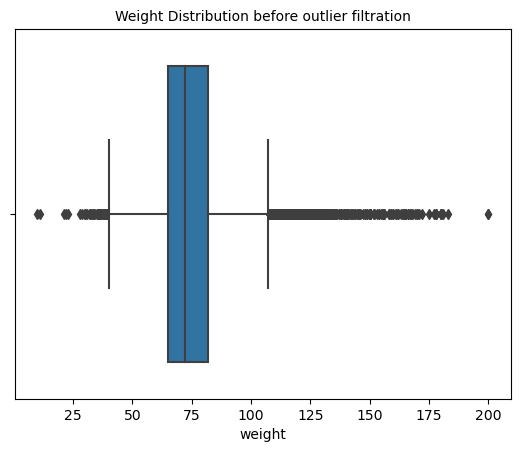

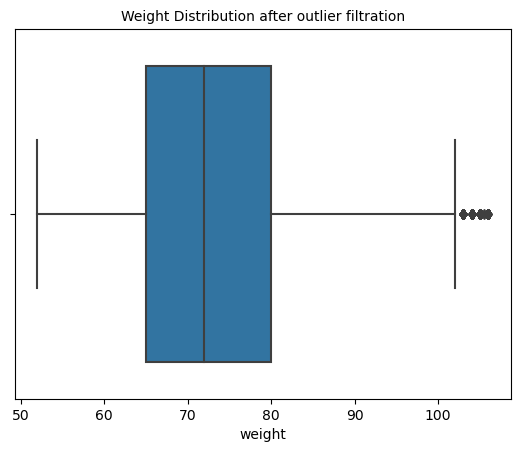

In [13]:
# Visualizing outliers using boxplot  

import seaborn as sns

weight_boxplot = sns.boxplot(x=df['weight'])
weight_boxplot.axes.set_title("Weight Distribution before outlier filtration", fontsize=10)
plt.show()
weight_boxplot = sns.boxplot(x=filtered['weight'])
weight_boxplot.axes.set_title("Weight Distribution after outlier filtration", fontsize=10)
plt.show()

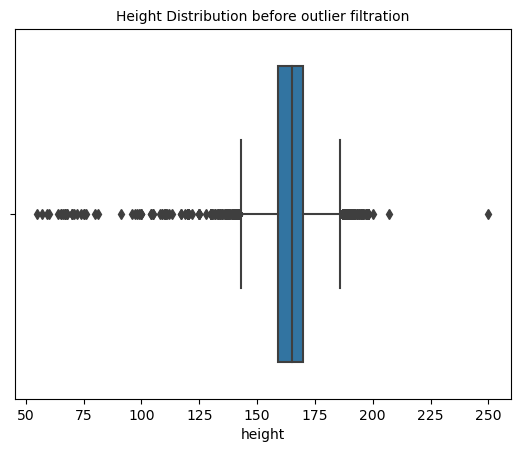

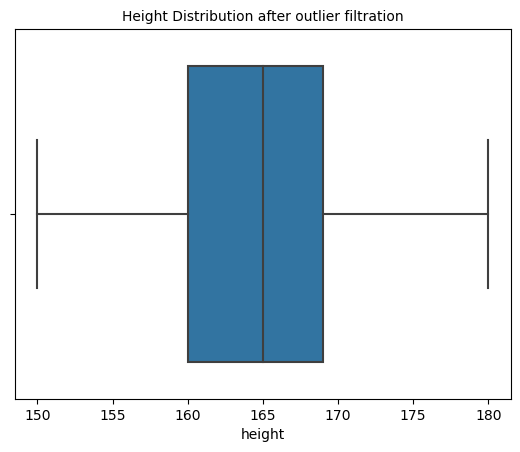

In [14]:
height_boxplot = sns.boxplot(x=df['height'])
height_boxplot.axes.set_title("Height Distribution before outlier filtration", fontsize=10)
plt.show()
height_boxplot = sns.boxplot(x=filtered['height'])
height_boxplot.axes.set_title("Height Distribution after outlier filtration", fontsize=10)
plt.show()

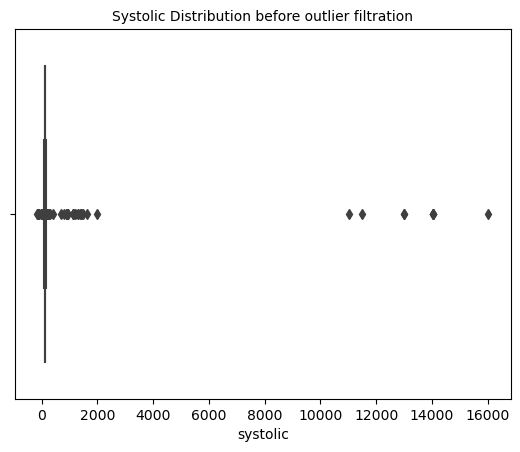

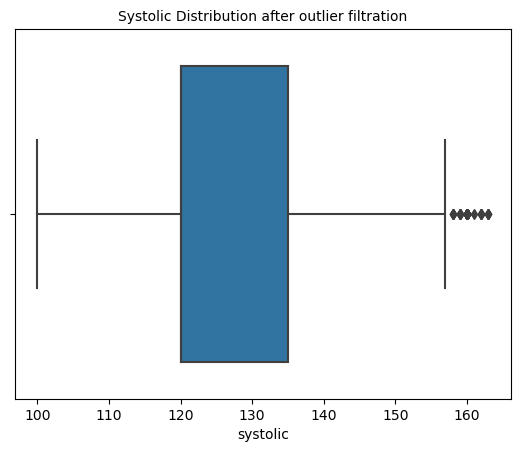

In [15]:
systolic_boxplot = sns.boxplot(x=df['systolic'])
systolic_boxplot.axes.set_title("Systolic Distribution before outlier filtration", fontsize=10)
plt.show()
systolic_boxplot = sns.boxplot(x=filtered['systolic'])
systolic_boxplot.axes.set_title("Systolic Distribution after outlier filtration", fontsize=10)
plt.show()

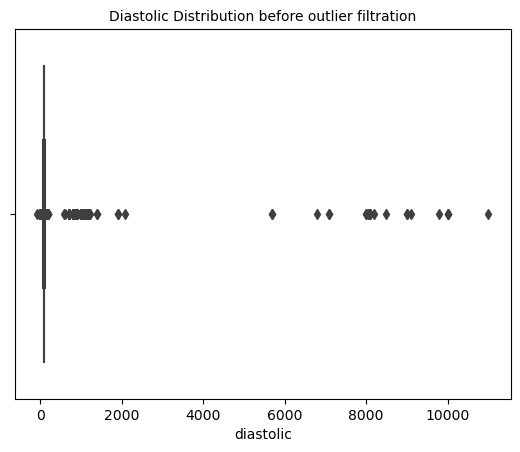

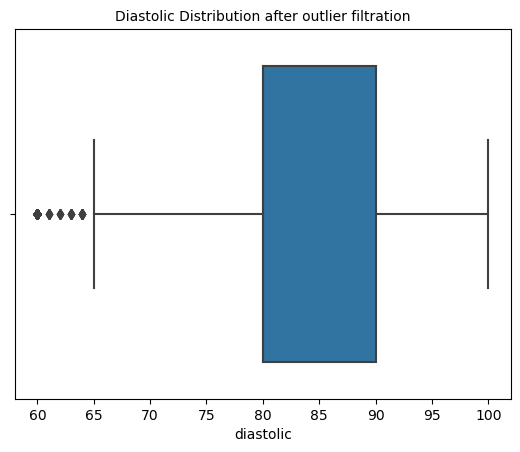

In [16]:
diastolic_boxplot = sns.boxplot(x=df['diastolic'])
diastolic_boxplot.axes.set_title("Diastolic Distribution before outlier filtration", fontsize=10)
plt.show()
diastolic_boxplot = sns.boxplot(x=filtered['diastolic'])
diastolic_boxplot.axes.set_title("Diastolic Distribution after outlier filtration", fontsize=10)
plt.show()

In [17]:
filtered.describe()
df = filtered.copy()

# Feature Engineering

In [18]:
# Transforming  age from days to years 
df['age'] = df['age'] // 365

# Attributes Constrution bmi (from height and weight) and pulse pressure (from systolic and diastolic)
df['bmi'] = round(df['weight'] / (df['height']/100)**2, 2)
df['pulse_pressure'] = df['systolic'] - df['diastolic']

df.head(3)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoking_habit,alcohol_intake,active_lifestyle,cardiovascular_disease,bmi,pulse_pressure
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97,30
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93,50
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51,60


In [19]:
# Feature reduction
df = df.drop(columns=['height', 'weight', 'systolic','diastolic'])
df.head(5)

,age,gender,cholesterol,glucose,smoking_habit,alcohol_intake,active_lifestyle,cardiovascular_disease,bmi,pulse_pressure
0,50,2,1,1,0,0,1,0,21.97,30
1,55,1,3,1,0,0,1,1,34.93,50
2,51,1,3,1,0,0,0,1,23.51,60
3,48,2,1,1,0,0,1,1,28.71,50
4,47,1,1,1,0,0,0,0,23.01,40


# Exploratory Data Analysis

In [20]:
df.shape

(60118, 10)

In [21]:
# Determining gender distribution
df['gender'].value_counts()

1    39233
2    20885
Name: gender, dtype: int64

In [22]:
# Determining average bmi by gender
df.groupby('gender')['bmi'].mean()

gender
1    27.618969
2    26.331773
Name: bmi, dtype: float64

In [23]:
df.age.describe()

count    60118.000000
mean        52.840198
std          6.748466
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

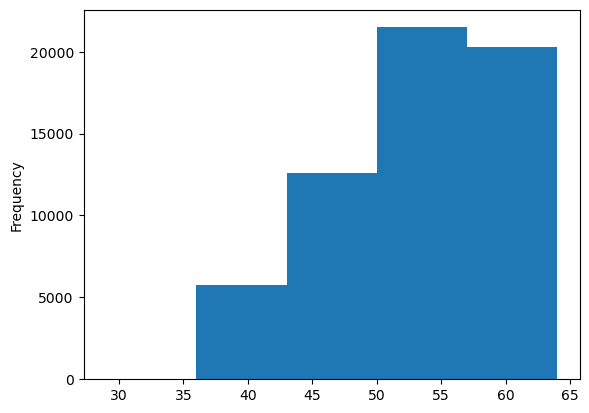

In [24]:
df.age.plot(kind='hist', bins=5)

In [25]:
# Determining CVD distribution
df['cardiovascular_disease'].value_counts() 

0    30762
1    29356
Name: cardiovascular_disease, dtype: int64

In [26]:
# Determining total no of men without CVD
# male = 2, female = 1
df [(df['cardiovascular_disease'] == 0) & (df['gender'] == 2 )]

,age,gender,cholesterol,glucose,smoking_habit,alcohol_intake,active_lifestyle,cardiovascular_disease,bmi,pulse_pressure
0,50,2,1,1,0,0,1,0,21.97,30
11,51,2,1,1,0,0,1,0,20.05,40
12,40,2,1,1,0,0,0,0,22.04,40
19,59,2,1,1,1,0,1,0,21.34,50
20,54,2,1,1,0,0,1,0,31.24,40
...,...,...,...,...,...,...,...,...,...,...
69971,55,2,1,1,0,0,1,0,25.54,50
69973,60,2,1,1,0,0,1,0,23.51,50
69980,48,2,1,1,0,1,0,0,24.74,30
69986,49,2,1,1,0,0,1,0,24.07,40


In [27]:
# Determining total no of women without CVD
# male = 2, female = 1
df [(df['cardiovascular_disease'] == 0) & (df['gender'] == 1 )]

,age,gender,cholesterol,glucose,smoking_habit,alcohol_intake,active_lifestyle,cardiovascular_disease,bmi,pulse_pressure
4,47,1,1,1,0,0,0,0,23.01,40
5,60,1,2,2,0,0,0,0,29.38,40
6,60,1,3,1,0,0,1,0,37.73,50
8,48,1,1,1,0,0,1,0,28.44,40
9,54,1,1,1,0,0,0,0,25.28,50
...,...,...,...,...,...,...,...,...,...,...
69977,46,1,1,1,0,0,1,0,26.57,41
69983,53,1,1,1,0,0,1,0,26.45,40
69988,60,1,1,1,0,0,1,0,23.05,40
69991,56,1,2,2,0,0,1,0,28.48,40


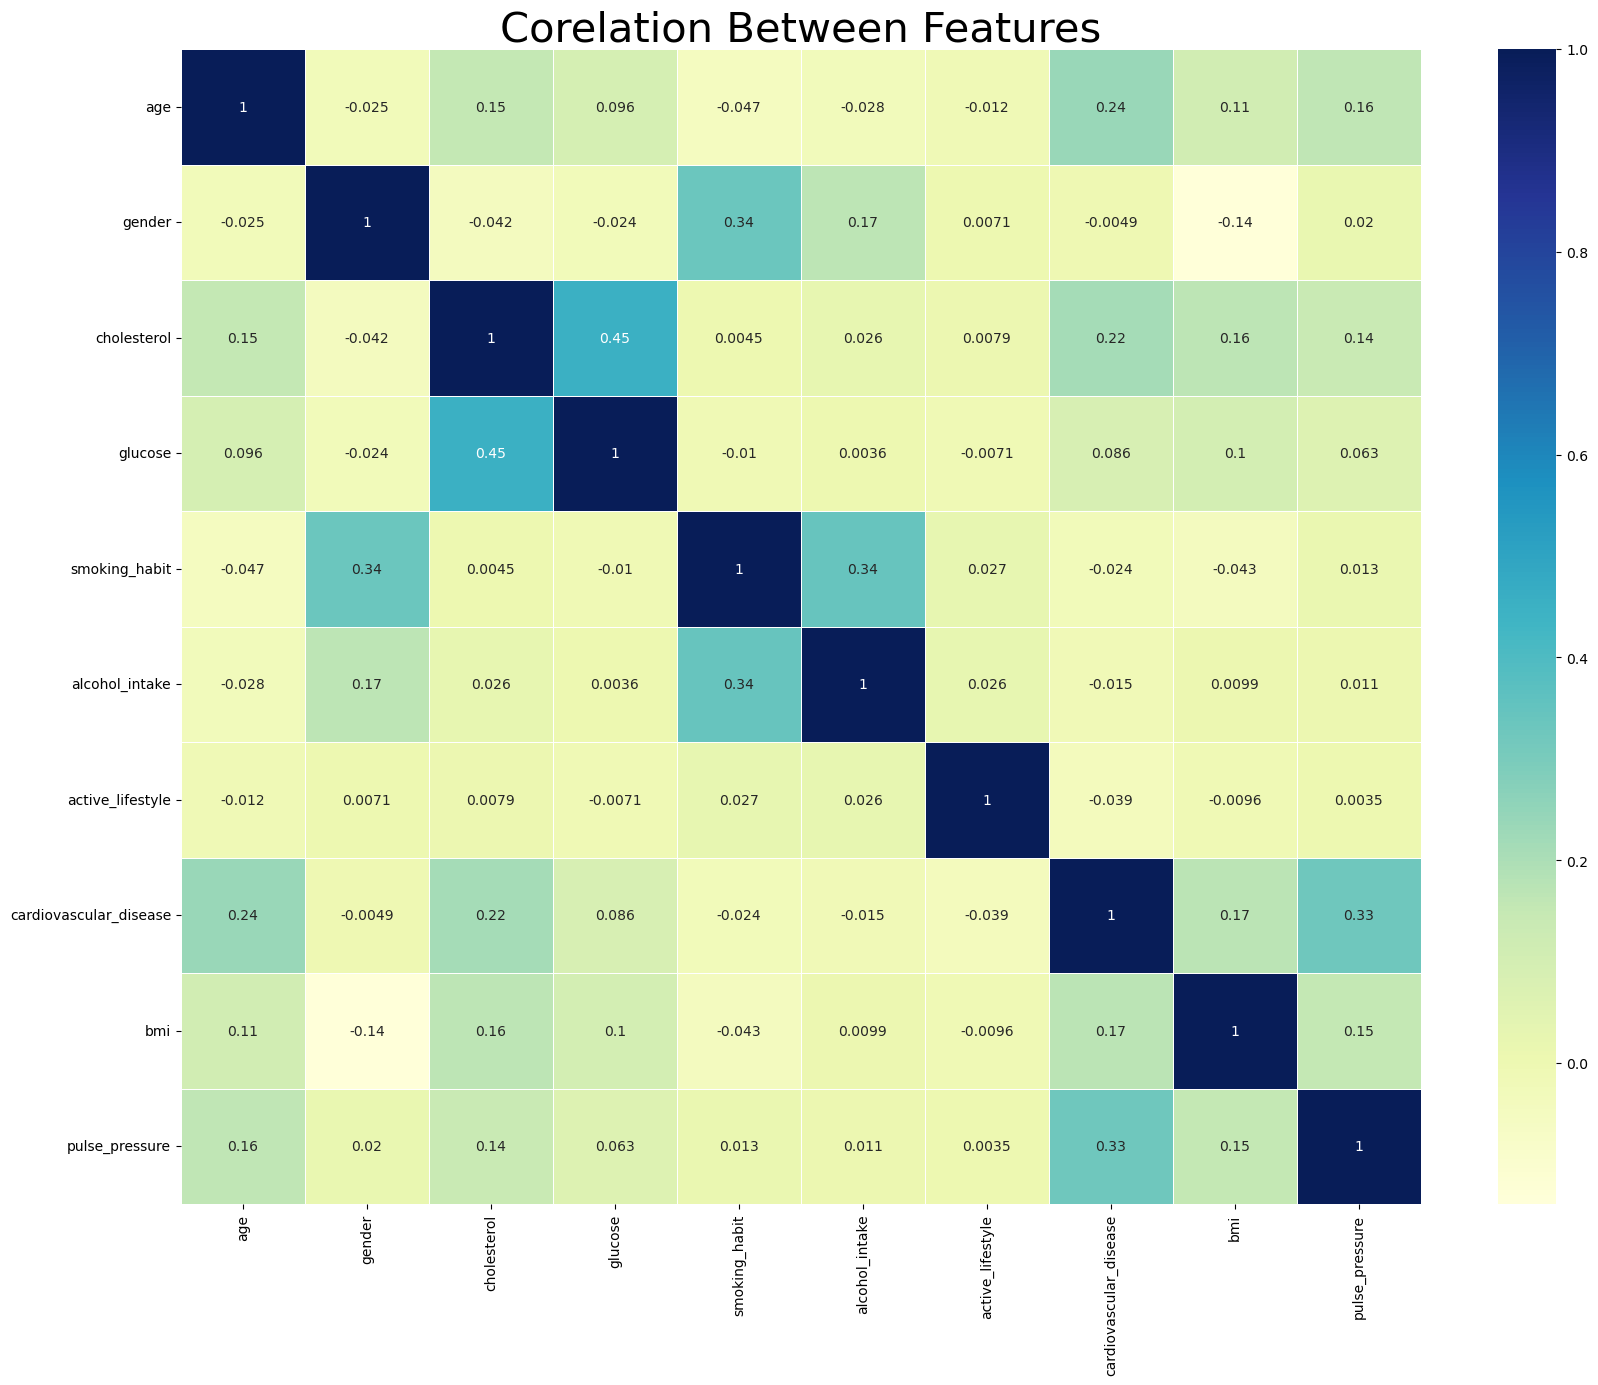

In [28]:
plt.rcParams['figure.figsize'] = (20, 15) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features', fontsize = 30)
plt.show()

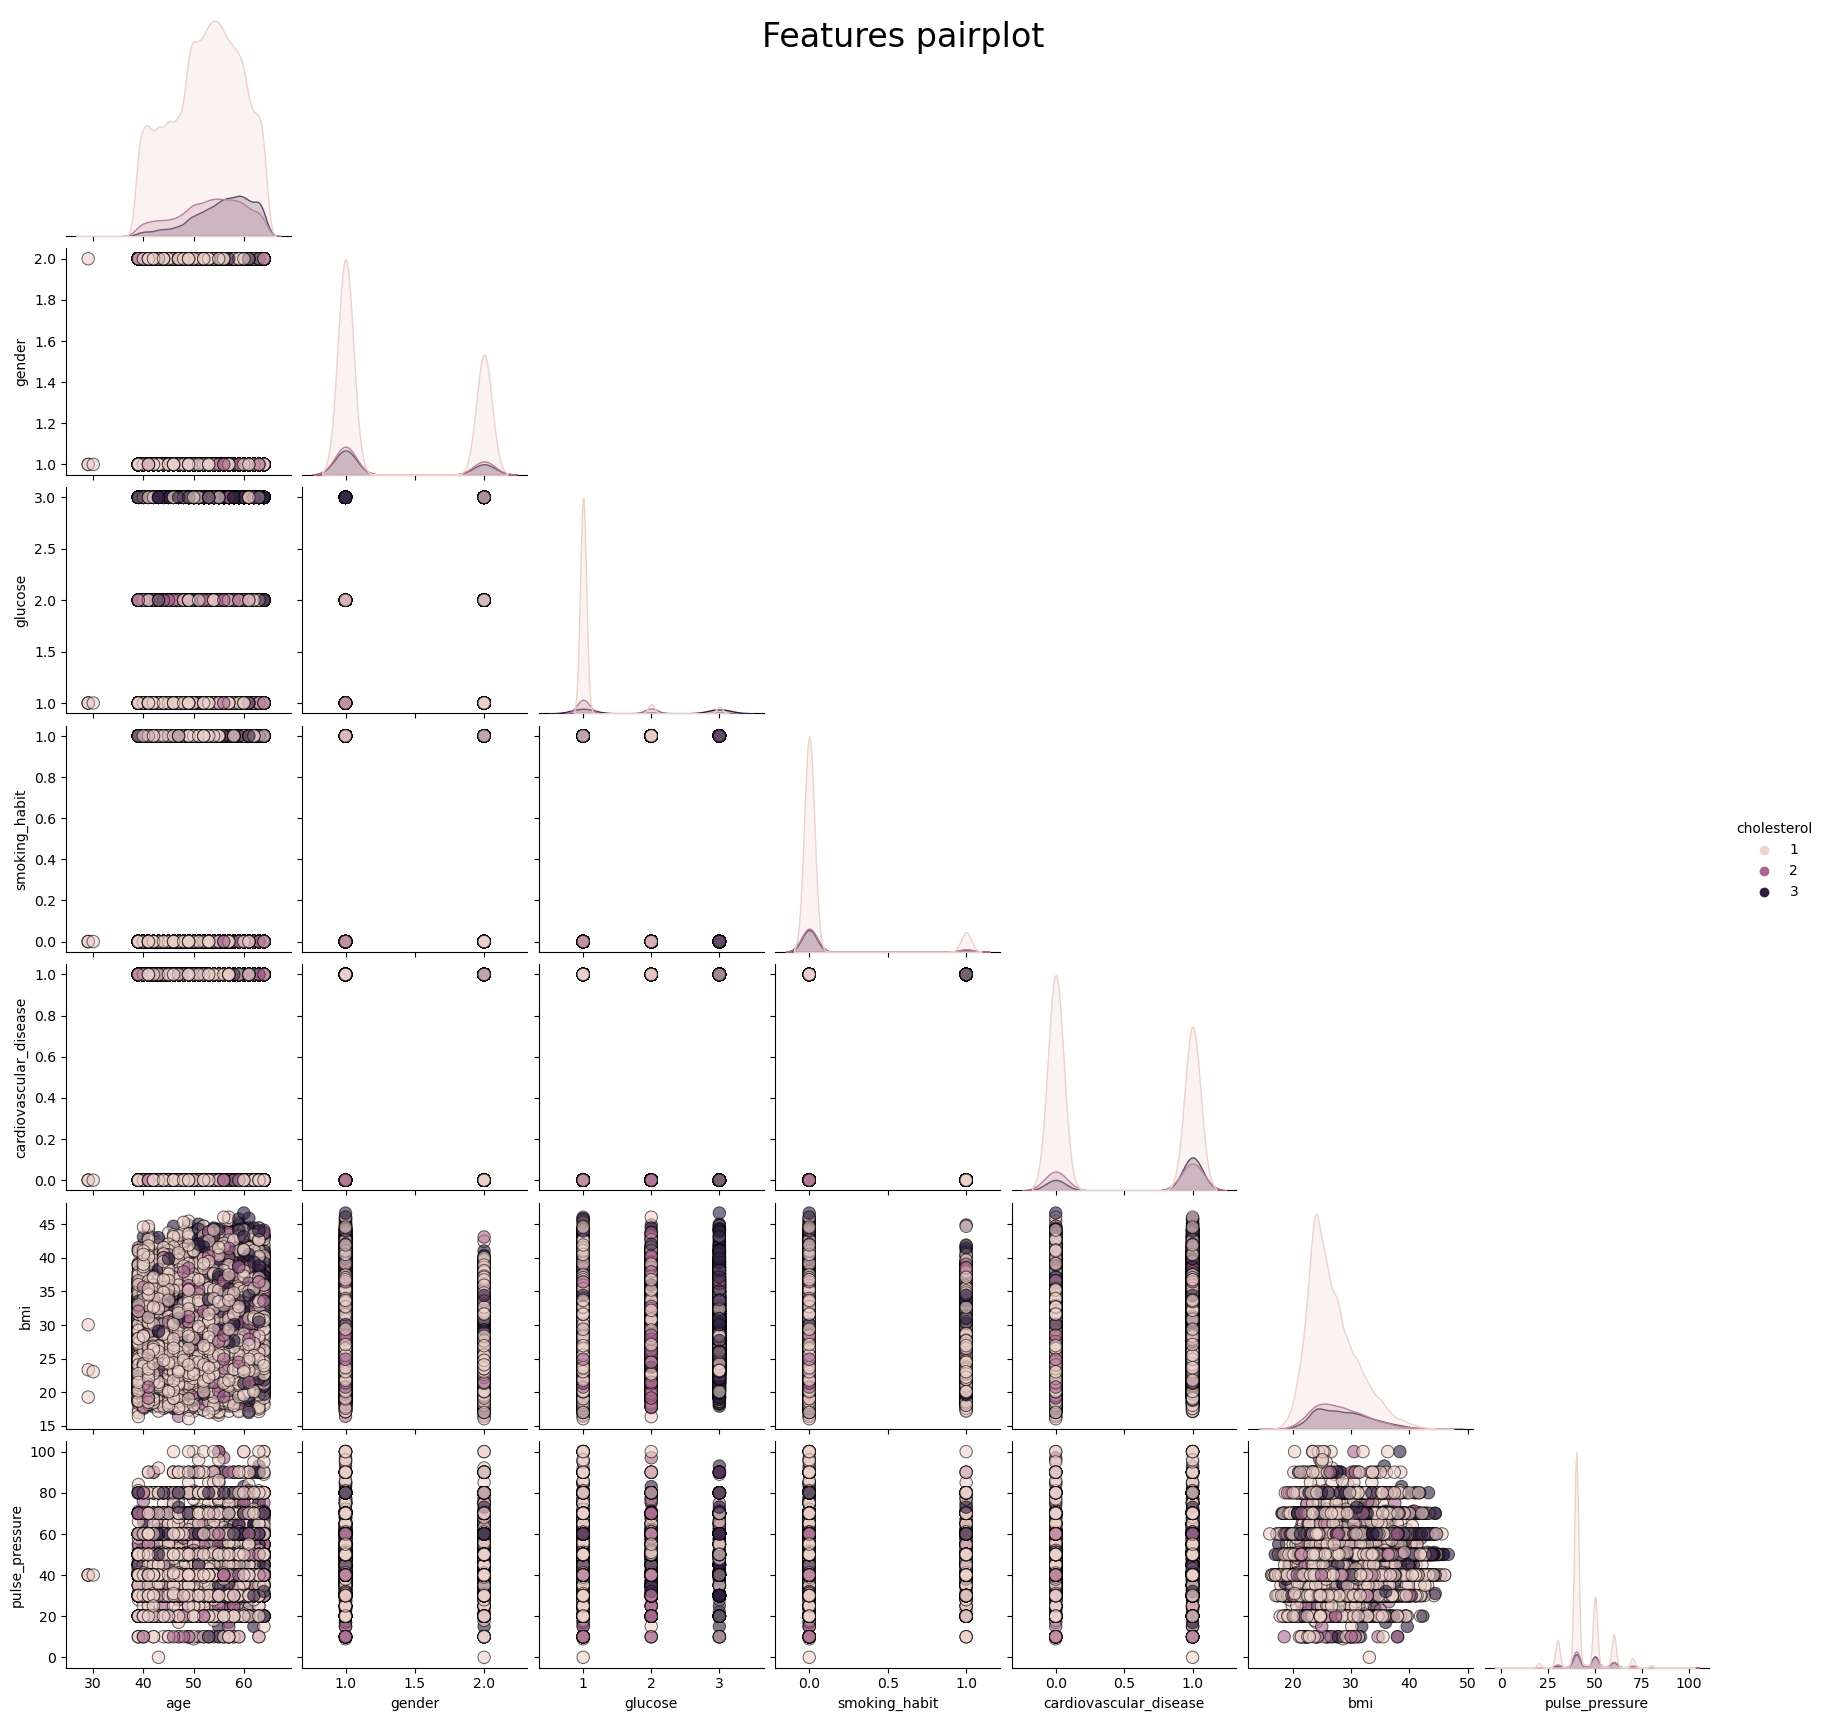

In [29]:
features = ['age', 'gender','cholesterol','glucose','smoking_habit','cardiovascular_disease','bmi', 'pulse_pressure']
data = df[features]
g = sns.pairplot(data, hue="cholesterol", corner=True, diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
plt.suptitle('Features pairplot' ,fontsize = 24);

In [30]:
processed_df = df.to_csv('preprocessed_dataset.csv', index=None)

# Data Analysis using Machine Learning Models

In [31]:
import os
from pathlib import Path
import json
import platform
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, precision_score, recall_score
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc, \
#             classification_report, recall_score, precision_recall_curve


from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



from sklearn.model_selection import train_test_split



## Performance Metrics

In [32]:
def calc_specificity(y_actual, y_pred, thresh=0.5):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual == 0)


def print_report(y_actual, y_pred, thresh):
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f' % auc)
    print('accuracy:%.3f' % accuracy)
    print('recall:%.3f' % recall)
    print('precision:%.3f' % precision)
    print('specificity:%.3f' % specificity)
    print(' ')
    return auc, accuracy, recall, precision, specificity


def report_performance(clf, train_x, train_y, test_x, test_y, thresh=0.5, clf_name="CLF"):
    print("[x] performance for {} classifier".format(clf_name))
    y_train_preds = clf.predict_proba(train_x)[:, 1]
    y_test_preds = clf.predict_proba(test_x)[:, 1]
    print('Training:')
    train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(train_y, y_train_preds,
                                                                                               thresh)
    print('Test:')
    test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(test_y, y_test_preds, thresh)
    return {"train": {"auc": train_auc, "acc": train_accuracy, "recall": train_recall, "precision": train_precision,
                      "specificity": train_specificity},
            "test": {"auc": test_auc, "acc": test_accuracy, "recall": test_recall, "precision": test_precision,
                     "specificity": test_specificity}}

def split_data(data_x, data_y, n_split):
    kf = StratifiedKFold(n_splits=n_split)
    tr_x = []
    tr_y = []
    te_x = []
    te_y = []
    for train_idx, test_idx in kf.split(data_x, data_y):
        train_x_cv = data_x[train_idx, :]
        train_y_cv = data_y[train_idx]
        test_x = data_x[test_idx, :]
        test_y = data_y[test_idx]

        tr_x.append(train_x_cv)
        tr_y.append(train_y_cv)
        te_x.append(test_x)
        te_y.append(test_y)

    return tr_x, tr_y, te_x, te_y

## Supervised Learning 

In [33]:
def train_bayesian(train_x, train_y, test_x, test_y, n_split=5):
    bayes = GaussianNB()
    parameters = {"priors": [None, [np.count_nonzero(train_y==0)/train_y.shape[0],train_y.sum()/train_y.shape[0]]]}
    auc_scoring = make_scorer(roc_auc_score)
    if n_split == 1:
        grid_clf = GridSearchCV(estimator=bayes, param_grid=parameters, cv=[(slice(None), slice(None))],
                                scoring=auc_scoring, verbose=0)
    else:
        grid_clf = GridSearchCV(estimator=bayes, param_grid=parameters, cv=n_split, scoring=auc_scoring, verbose=0)
    grid_clf.fit(train_x, train_y)

    print(grid_clf.best_estimator_)
    print(grid_clf.best_params_)
    report_performance(grid_clf.best_estimator_, train_x, train_y, test_x, test_y, clf_name="GaussianNB")
    return grid_clf.best_estimator_, grid_clf.best_params_


def train_lr(train_x, train_y, test_x, test_y, n_split=5):
    lr = LogisticRegression(random_state=42)
    parameters = {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000],
                  'penalty': ["l1", "l2", "elasticnet"]}
    auc_scoring = make_scorer(roc_auc_score)
    if n_split == 1:
        grid_clf = GridSearchCV(estimator=lr, param_grid=parameters, cv=[(slice(None), slice(None))],
                                scoring=auc_scoring, verbose=0)
    else:
        grid_clf = GridSearchCV(estimator=lr, param_grid=parameters, cv=n_split, scoring=auc_scoring, verbose=0)
    grid_clf.fit(train_x, train_y)

    print(grid_clf.best_estimator_)
    print(grid_clf.best_params_)
    report_performance(grid_clf.best_estimator_, train_x, train_y, test_x, test_y, clf_name="LR")
    return grid_clf.best_estimator_, grid_clf.best_params_


## Ensemble Learning

In [34]:
def train_rf(train_x, train_y, test_x, test_y, n_split=5):
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(max_depth=6, random_state=42)
    rf.fit(train_x, train_y)

    n_estimators = range(5, 20, 5)
    max_features = ['auto', 'sqrt']
    max_depth = range(1, 5, 1)
    min_samples_split = range(2, 6, 2)
    criterion = ['gini', 'entropy']
    parameters = {'n_estimators': n_estimators, 'max_features': max_features,
                  'max_depth': max_depth, 'min_samples_split': min_samples_split, 'criterion': criterion}
    auc_scoring = make_scorer(roc_auc_score)
    if n_split == 1:
        grid_clf = GridSearchCV(estimator=rf, param_grid=parameters, cv=[(slice(None), slice(None))],
                                scoring=auc_scoring, verbose=0, n_jobs=-1)
    else:
        grid_clf = GridSearchCV(estimator=rf, param_grid=parameters, cv=n_split, scoring=auc_scoring, verbose=0,
                                n_jobs=-1)
    grid_clf.fit(train_x, train_y)

    print(grid_clf.best_estimator_)
    print(grid_clf.best_params_)
    report_performance(grid_clf.best_estimator_, train_x, train_y, test_x, test_y, clf_name="RF")
    return grid_clf.best_estimator_, grid_clf.best_params_


In [36]:
if __name__ == '__main__':
    csv_data_path = "preprocessed_dataset.csv"
    cv_max = 5

    if cv_max > 1:
        
        df = pd.read_csv(csv_data_path)
        data_y = df['cardiovascular_disease'].values
        df = df.drop(columns=['cardiovascular_disease'])
        data_x = df.to_numpy()
         

        tr_x, tr_y, te_x, te_y = split_data(data_x, data_y, n_split=cv_max)
        for i in range(len(tr_x)):
            print("--------------------train on cv = {}-----------------------".format(i))
            best_estimator_, best_params_ = train_bayesian(tr_x[i], tr_y[i], te_x[i], te_y[i], cv_max)
            print(f"Bayesian best parameters = {best_params_}")
            best_estimator_, best_params_ = train_lr(tr_x[i], tr_y[i], te_x[i], te_y[i], cv_max)
            print(f"LogisticRegression best parameters = {best_params_}")
            best_estimator_, best_params_ = train_rf(tr_x[i], tr_y[i], te_x[i], te_y[i], cv_max)
            print(f"RandomForest best parameters = {best_params_}")
            
        df = pd.read_csv(csv_data_path)
        data_y = df['cardiovascular_disease'].values
        df = df.drop(columns=['cardiovascular_disease'])
        data_x = df.to_numpy()

        train_lr(data_x, data_y, data_x, data_y, cv_max)
        train_rf(data_x, data_y, data_x, data_y, cv_max)
        


--------------------train on cv = 0-----------------------
GaussianNB()
{'priors': None}
[x] performance for GaussianNB classifier
Training:
AUC:0.729
accuracy:0.665
recall:0.527
precision:0.712
specificity:0.796
 
Test:
AUC:0.721
accuracy:0.660
recall:0.514
precision:0.710
specificity:0.799
 
Bayesian best parameters = {'priors': None}


/Users/ifunanyaakpoveta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ifunanyaakpoveta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

LogisticRegression(C=10, random_state=42)
{'C': 10, 'penalty': 'l2'}
[x] performance for LR classifier
Training:
AUC:0.750
accuracy:0.688
recall:0.620
precision:0.705
specificity:0.752
 
Test:
AUC:0.743
accuracy:0.682
recall:0.610
precision:0.701
specificity:0.751
 
LogisticRegression best parameters = {'C': 10, 'penalty': 'l2'}
RandomForestClassifier(max_depth=4, n_estimators=15, random_state=42)
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15}
[x] performance for RF classifier
Training:
AUC:0.748
accuracy:0.686
recall:0.628
precision:0.699
specificity:0.741
 
Test:
AUC:0.743
accuracy:0.685
recall:0.622
precision:0.700
specificity:0.745
 
RandomForest best parameters = {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15}
--------------------train on cv = 1-----------------------
GaussianNB()
{'priors': None}
[x] performance for GaussianNB classifier
Training:
AUC:0.726
accurac

/Users/ifunanyaakpoveta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ifunanyaakpoveta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

LogisticRegression(C=0.01, random_state=42)
{'C': 0.01, 'penalty': 'l2'}
[x] performance for LR classifier
Training:
AUC:0.747
accuracy:0.685
recall:0.615
precision:0.703
specificity:0.752
 
Test:
AUC:0.753
accuracy:0.690
recall:0.618
precision:0.709
specificity:0.758
 
LogisticRegression best parameters = {'C': 0.01, 'penalty': 'l2'}
RandomForestClassifier(max_depth=3, n_estimators=15, random_state=42)
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15}
[x] performance for RF classifier
Training:
AUC:0.741
accuracy:0.684
recall:0.646
precision:0.689
specificity:0.721
 
Test:
AUC:0.744
accuracy:0.687
recall:0.644
precision:0.693
specificity:0.728
 
RandomForest best parameters = {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15}
--------------------train on cv = 2-----------------------
GaussianNB()
{'priors': None}
[x] performance for GaussianNB classifier
Training:
AUC:0.730
a

/Users/ifunanyaakpoveta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ifunanyaakpoveta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

LogisticRegression(C=10, random_state=42)
{'C': 10, 'penalty': 'l2'}
[x] performance for LR classifier
Training:
AUC:0.749
accuracy:0.686
recall:0.619
precision:0.703
specificity:0.750
 
Test:
AUC:0.747
accuracy:0.682
recall:0.617
precision:0.697
specificity:0.744
 
LogisticRegression best parameters = {'C': 10, 'penalty': 'l2'}
RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=15,
                       random_state=42)
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15}
[x] performance for RF classifier
Training:
AUC:0.744
accuracy:0.687
recall:0.629
precision:0.699
specificity:0.742
 
Test:
AUC:0.743
accuracy:0.685
recall:0.630
precision:0.695
specificity:0.737
 
RandomForest best parameters = {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15}
--------------------train on cv = 3-----------------------
GaussianNB()
{'priors': None}
[x] performance for

/Users/ifunanyaakpoveta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ifunanyaakpoveta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

LogisticRegression(C=1000, random_state=42)
{'C': 1000, 'penalty': 'l2'}
[x] performance for LR classifier
Training:
AUC:0.747
accuracy:0.684
recall:0.614
precision:0.702
specificity:0.752
 
Test:
AUC:0.752
accuracy:0.691
recall:0.622
precision:0.709
specificity:0.757
 
LogisticRegression best parameters = {'C': 1000, 'penalty': 'l2'}
RandomForestClassifier(max_depth=3, n_estimators=15, random_state=42)
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15}
[x] performance for RF classifier
Training:
AUC:0.742
accuracy:0.686
recall:0.646
precision:0.691
specificity:0.725
 
Test:
AUC:0.747
accuracy:0.690
recall:0.652
precision:0.695
specificity:0.726
 
RandomForest best parameters = {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15}
--------------------train on cv = 4-----------------------
GaussianNB()
{'priors': None}
[x] performance for GaussianNB classifier
Training:
AUC:0.727
a

/Users/ifunanyaakpoveta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ifunanyaakpoveta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

LogisticRegression(C=0.1, random_state=42)
{'C': 0.1, 'penalty': 'l2'}
[x] performance for LR classifier
Training:
AUC:0.749
accuracy:0.688
recall:0.620
precision:0.705
specificity:0.753
 
Test:
AUC:0.746
accuracy:0.684
recall:0.618
precision:0.699
specificity:0.746
 
LogisticRegression best parameters = {'C': 0.1, 'penalty': 'l2'}
RandomForestClassifier(max_depth=3, n_estimators=15, random_state=42)
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15}
[x] performance for RF classifier
Training:
AUC:0.744
accuracy:0.688
recall:0.643
precision:0.695
specificity:0.730
 
Test:
AUC:0.737
accuracy:0.682
recall:0.642
precision:0.687
specificity:0.721
 
RandomForest best parameters = {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15}


/Users/ifunanyaakpoveta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ifunanyaakpoveta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

LogisticRegression(C=0.1, random_state=42)
{'C': 0.1, 'penalty': 'l2'}
[x] performance for LR classifier
Training:
AUC:0.748
accuracy:0.686
recall:0.618
precision:0.703
specificity:0.751
 
Test:
AUC:0.748
accuracy:0.686
recall:0.618
precision:0.703
specificity:0.751
 
RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=15,
                       random_state=42)
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 15}
[x] performance for RF classifier
Training:
AUC:0.748
accuracy:0.687
recall:0.619
precision:0.705
specificity:0.753
 
Test:
AUC:0.748
accuracy:0.687
recall:0.619
precision:0.705
specificity:0.753
 
